In [78]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [79]:
X_test = pd.read_csv(r"C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\BioFusion\Processed data\X_test.csv")
y_test = pd.read_csv(r"C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\BioFusion\Processed data\y_test.csv") 

In [80]:
#  Define Evaluation Function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_pred, rmse, mae, r2

In [81]:
import os
print(os.getcwd())  # shows the folder Python is running in
print(os.listdir())  # shows all files in that folder


C:\Users\venus\AI-Based-Emergency-Room-Triage-System\Model_evaluation updated
['.ipynb_checkpoints', 'Evaluation_report_updated.ipynb']


In [87]:
# Load All Models (Fixed)
import os
import joblib
model_files = [
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\best_lasso_model.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\ridge_model.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\linear_model.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\decision_tree_model.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\random_forest_model.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\gradient_boosting.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\xgboost_model.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\knn_model.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\svm_model.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\ensemble_pipeline.pkl"
]

models = {}
for file in model_files:
    try:
        # get only the filename without extension
        key = os.path.splitext(os.path.basename(file))[0]
        models[key] = joblib.load(file)
        print(f"Loaded {key}")
    except FileNotFoundError:
        print(f"WARNING: {file} not found, skipping.")
    except Exception as e:
        print(f"ERROR loading {file}: {e}")


Loaded best_lasso_model
Loaded ridge_model
Loaded linear_model
Loaded decision_tree_model
Loaded random_forest_model
Loaded gradient_boosting
Loaded xgboost_model
Loaded knn_model
Loaded svm_model
Loaded ensemble_pipeline


In [88]:
# Evaluate Models & Visualize
results = []

for name, model in models.items():
    print(f"\nEvaluating {name} ...")
    y_pred, rmse, mae, r2 = evaluate_model(model, X_test, y_test)
    
    # Save metrics
    results.append({'Model': name, 'RMSE': rmse, 'MAE': mae, 'R2': r2})
print(results)


Evaluating best_lasso_model ...

Evaluating ridge_model ...

Evaluating linear_model ...

Evaluating decision_tree_model ...

Evaluating random_forest_model ...

Evaluating gradient_boosting ...

Evaluating xgboost_model ...

Evaluating knn_model ...


C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(



Evaluating svm_model ...

Evaluating ensemble_pipeline ...
[{'Model': 'best_lasso_model', 'RMSE': np.float64(0.9626732672917854), 'MAE': 0.7653122995104235, 'R2': 0.22657763437939793}, {'Model': 'ridge_model', 'RMSE': np.float64(0.9658875833163694), 'MAE': 0.762533385436649, 'R2': 0.22140417763032083}, {'Model': 'linear_model', 'RMSE': np.float64(0.9661596108306463), 'MAE': 0.7626627841839286, 'R2': 0.22096555658395312}, {'Model': 'decision_tree_model', 'RMSE': np.float64(1.2502583657802921), 'MAE': 0.8941261029881352, 'R2': -0.30454312750813295}, {'Model': 'random_forest_model', 'RMSE': np.float64(0.9053288855497171), 'MAE': 0.7136327366759778, 'R2': 0.31597549997522845}, {'Model': 'gradient_boosting', 'RMSE': np.float64(0.8703875791851641), 'MAE': 0.6810251026432754, 'R2': 0.36775664652777407}, {'Model': 'xgboost_model', 'RMSE': np.float64(0.8973826975127658), 'MAE': 0.698525607585907, 'R2': 0.3279303312301636}, {'Model': 'knn_model', 'RMSE': np.float64(0.9555817240185421), 'MAE': 0

In [92]:
# Normalize metrics so we can combine them
results_df['RMSE_norm'] = results_df['RMSE'] / results_df['RMSE'].max()
results_df['R2_norm'] = 1 - (results_df['R2'].max() - results_df['R2']) / results_df['R2'].max()

# Composite score: higher = better
results_df['Score'] = results_df['R2_norm'] - results_df['RMSE_norm']  # or tweak weights

# Sort by composite score
results_df = results_df.sort_values(by='Score', ascending=False)
print(results_df[['Model','RMSE','MAE','R2','Score']])


                 Model      RMSE       MAE        R2     Score
5    gradient_boosting  0.870388  0.681025  0.367757  0.303834
9    ensemble_pipeline  0.872979  0.680662  0.363987  0.291510
6        xgboost_model  0.897383  0.698526  0.327930  0.173947
4  random_forest_model  0.905329  0.713633  0.315975  0.135084
7            knn_model  0.955582  0.748899  0.237931 -0.117329
0     best_lasso_model  0.962673  0.765312  0.226578 -0.153872
1          ridge_model  0.965888  0.762533  0.221404 -0.170510
2         linear_model  0.966160  0.762663  0.220966 -0.171921
8            svm_model  1.104197  0.872053 -0.017542 -0.930875
3  decision_tree_model  1.250258  0.894126 -0.304543 -1.828110



Evaluating best_lasso_model ...


C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


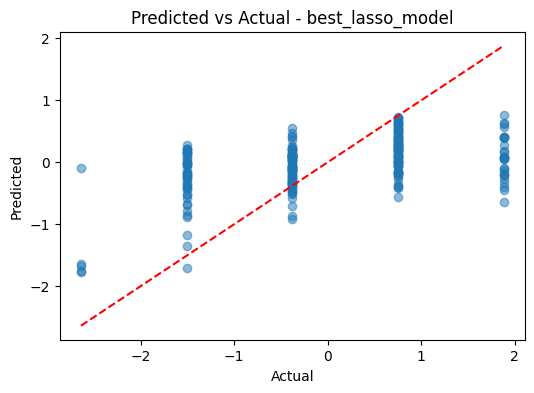


Evaluating ridge_model ...


C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


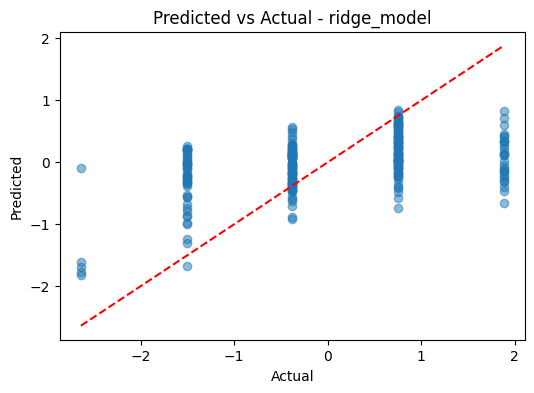


Evaluating linear_model ...


C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


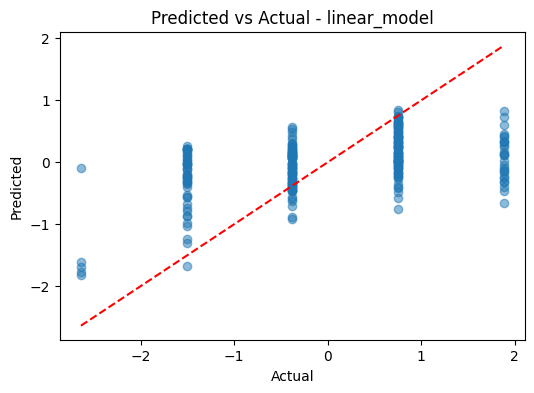


Evaluating decision_tree_model ...


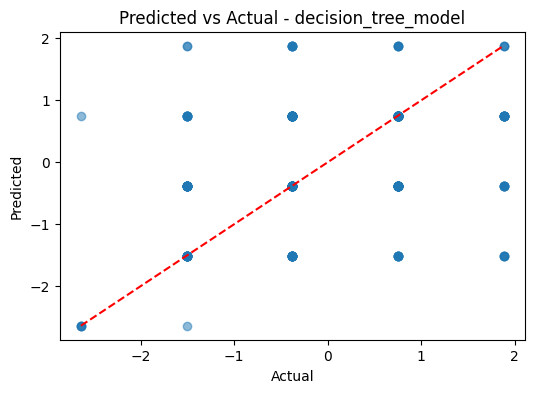


Evaluating random_forest_model ...


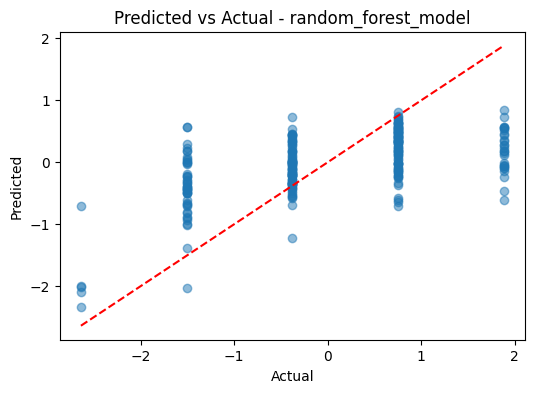


Evaluating gradient_boosting ...


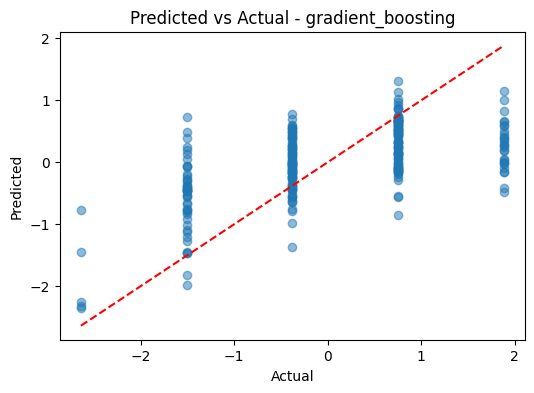


Evaluating xgboost_model ...


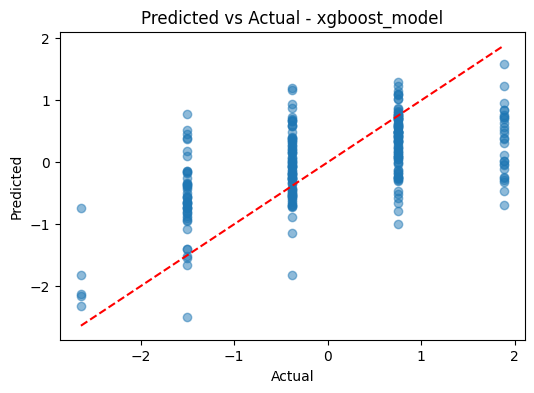


Evaluating knn_model ...


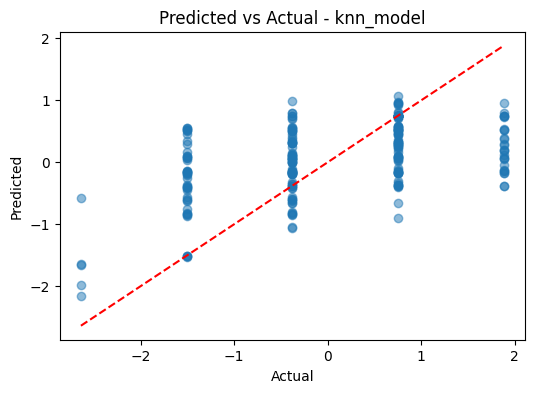


Evaluating svm_model ...


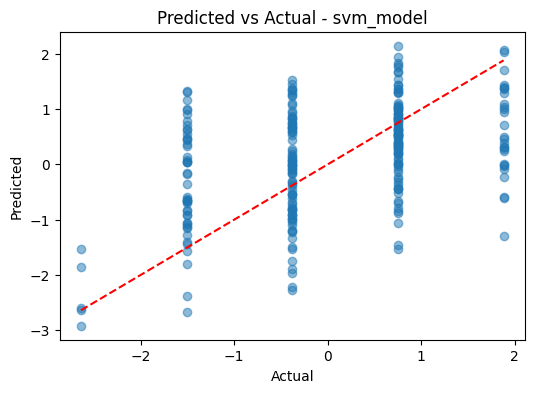


Evaluating ensemble_pipeline ...


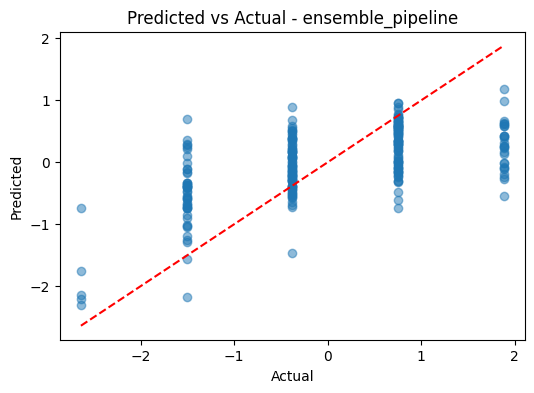

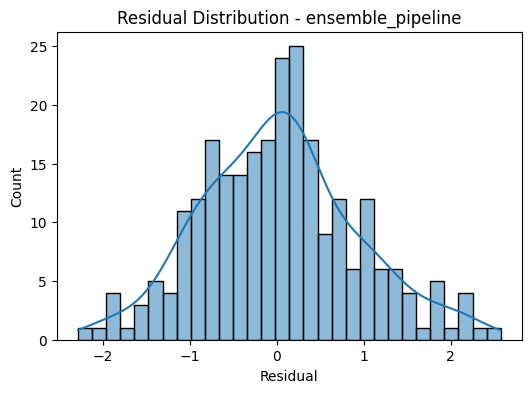

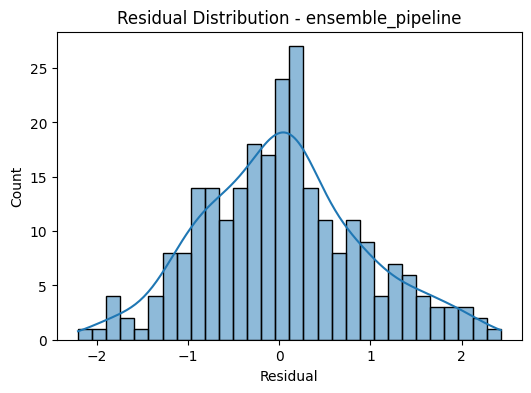

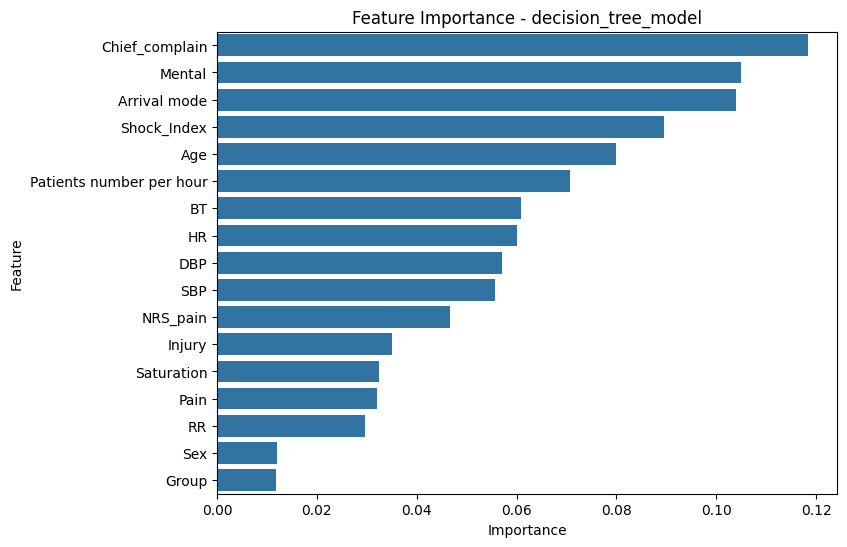

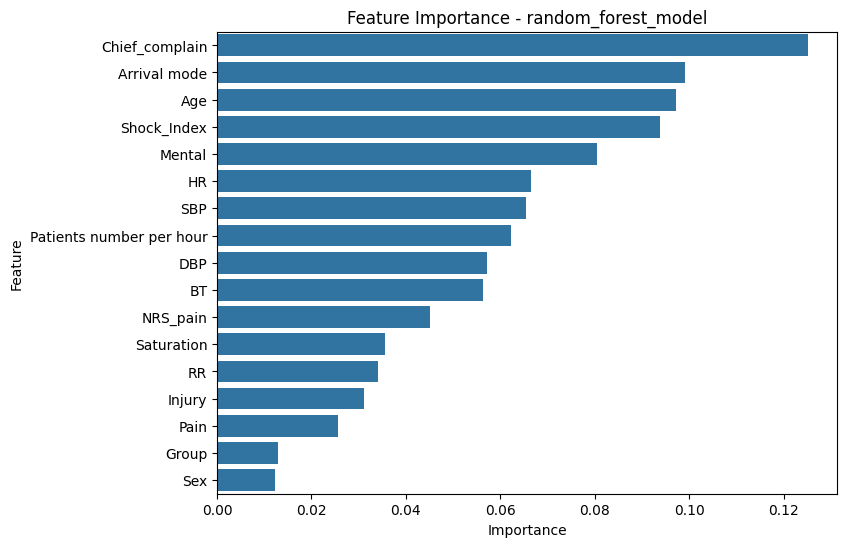

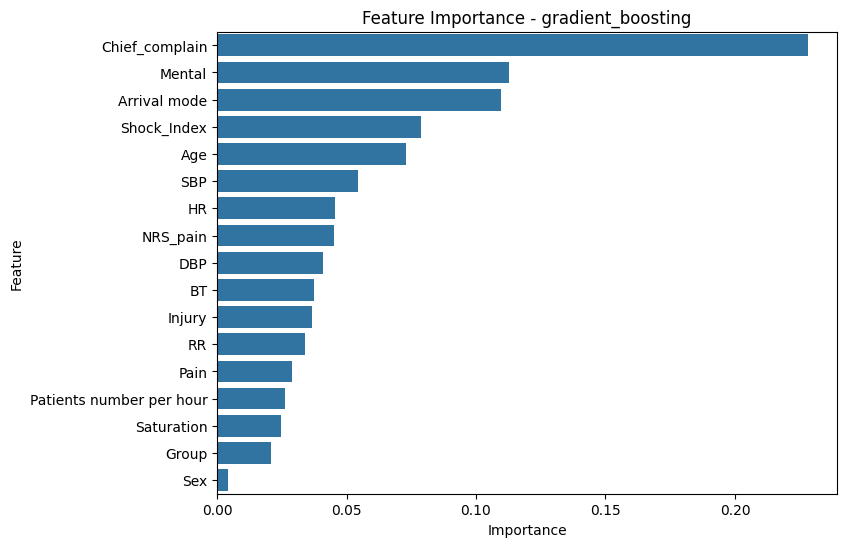

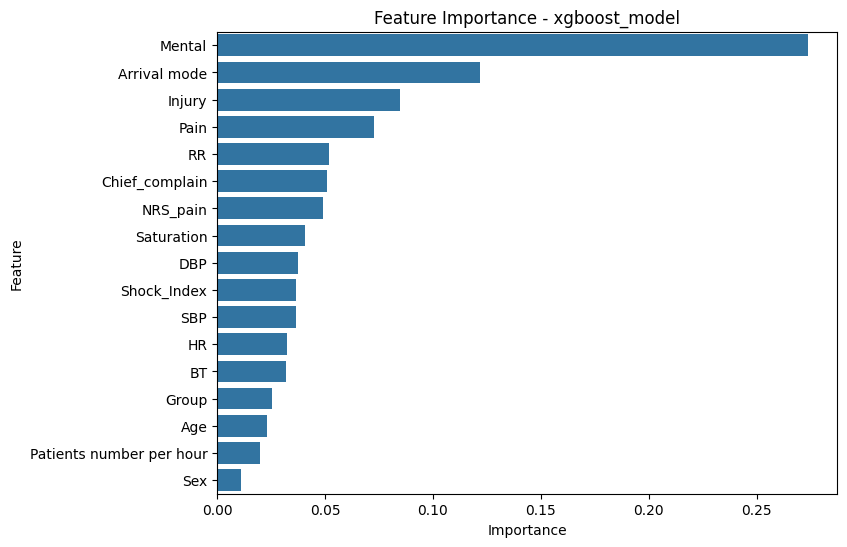


Model Ranking (Composite Score - higher is better):
                 Model      RMSE       MAE        R2     Score
5    gradient_boosting  0.870388  0.681025  0.367757  0.303834
9    ensemble_pipeline  0.872979  0.680662  0.363987  0.296154
6        xgboost_model  0.897383  0.698526  0.327930  0.223003
4  random_forest_model  0.905329  0.713633  0.315975  0.198866
7            knn_model  0.955582  0.748899  0.237931  0.042585
0     best_lasso_model  0.962673  0.765312  0.226578  0.020026
1          ridge_model  0.965888  0.762533  0.221404  0.009760
2         linear_model  0.966160  0.762663  0.220966  0.008890
8            svm_model  1.104197  0.872053 -0.017542 -0.456281
3  decision_tree_model  1.250258  0.894126 -0.304543 -1.000000


C:\Users\venus\AppData\Local\Temp\ipykernel_23020\200143307.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df, palette='coolwarm')


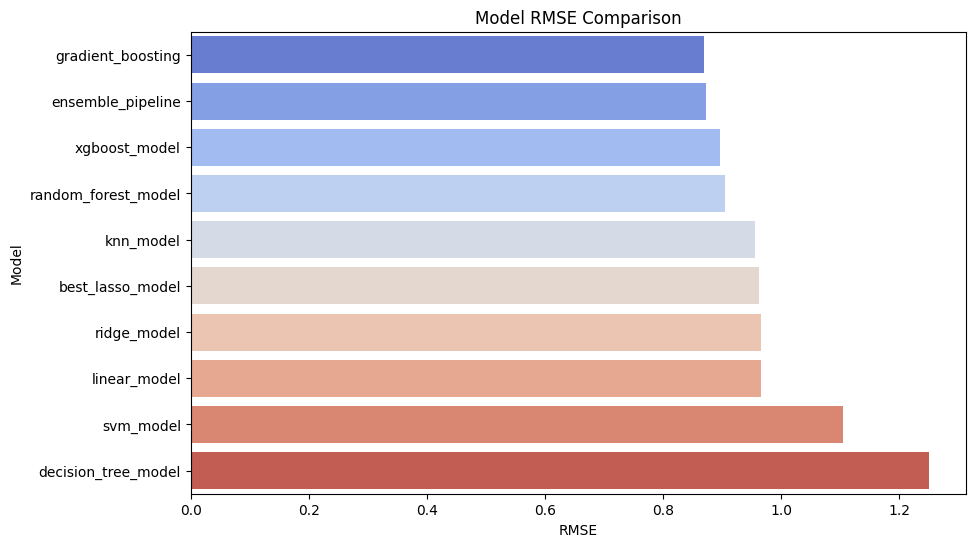

C:\Users\venus\AppData\Local\Temp\ipykernel_23020\200143307.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=results_df, palette='viridis')


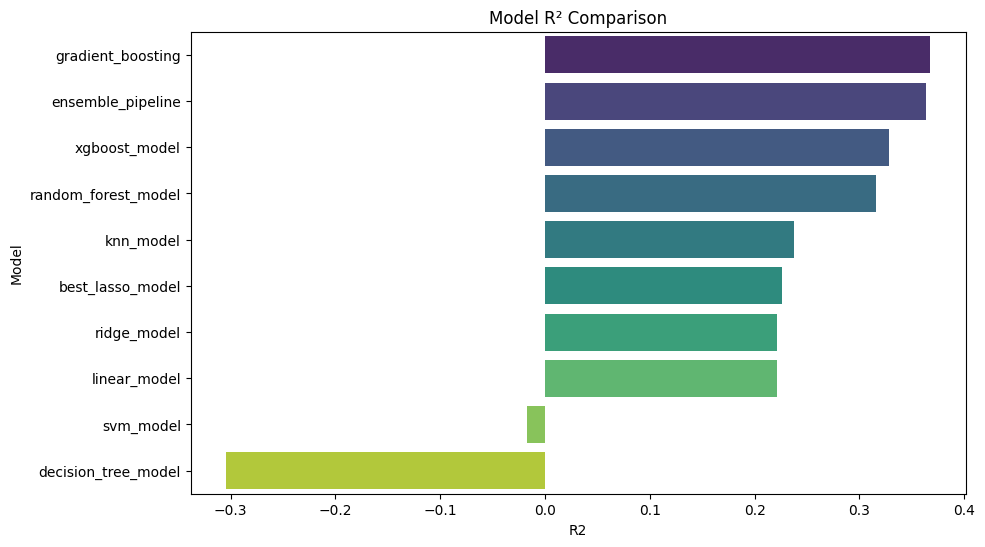

C:\Users\venus\AppData\Local\Temp\ipykernel_23020\200143307.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Model', data=results_df, palette='magma')


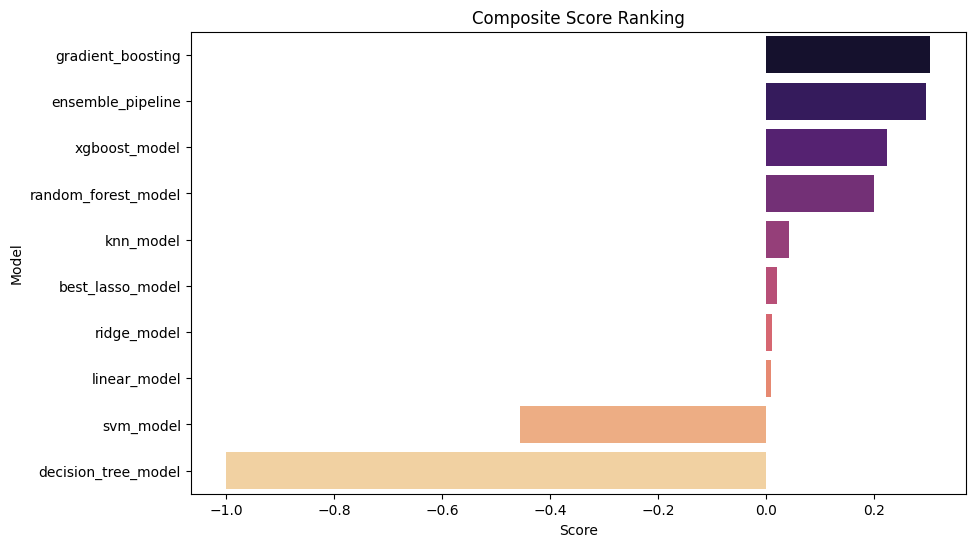

In [97]:
 #4️⃣ Define evaluation function
# ===============================
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_pred, rmse, mae, r2

# ===============================
# 5️⃣ Evaluate all models
# ===============================
results = []

for name, model in models.items():
    print(f"\nEvaluating {name} ...")
    y_pred, rmse, mae, r2 = evaluate_model(model, X_test, y_test)
    
    # Save metrics
    results.append({'Model': name, 'RMSE': rmse, 'MAE': mae, 'R2': r2})
    
    # Predicted vs Actual
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Predicted vs Actual - {name}")
    plt.show()
    
    # Residual Distribution
    # Flatten y_test just in case
y_test_flat = y_test.values.flatten() if isinstance(y_test, pd.DataFrame) else y_test
y_test = y_test.values.flatten()  # converts DataFrame (254,1) -> 1D array (254,)

# Residuals

plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title(f"Residual Distribution - {name}")
plt.xlabel("Residual")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title(f"Residual Distribution - {name}")
plt.xlabel("Residual")
plt.show()

# ===============================
# 6️⃣ Feature importance for tree-based models
# ===============================
tree_models = ['decision_tree_model','random_forest_model','gradient_boosting','xgboost_model']

for name in tree_models:
    model = models.get(name)
    if model and hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feat_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': importances})
        feat_df = feat_df.sort_values('Importance', ascending=False)
        
        plt.figure(figsize=(8,6))
        sns.barplot(x='Importance', y='Feature', data=feat_df)
        plt.title(f'Feature Importance - {name}')
        plt.show()
    else:
        print(f"Skipping {name} (no feature_importances_)")

# ===============================
# 7️⃣ Create results table
# ===============================
results_df = pd.DataFrame(results)
results_df.columns = [col.strip() for col in results_df.columns]  # clean column names

# ===============================
# 8️⃣ Compute composite score for fair ranking
# ===============================
# Normalize RMSE (lower better) and R2 (higher better)
results_df['RMSE_norm'] = results_df['RMSE'] / results_df['RMSE'].max()
results_df['R2_norm'] = (results_df['R2'] - results_df['R2'].min()) / (results_df['R2'].max() - results_df['R2'].min())

# Composite score: higher = better
results_df['Score'] = results_df['R2_norm'] - results_df['RMSE_norm']

# Sort by composite score
results_df = results_df.sort_values(by='Score', ascending=False)

# Display ranking
print("\nModel Ranking (Composite Score - higher is better):")
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
print(results_df[['Model','RMSE','MAE','R2','Score']])

# ===============================
# 9️⃣ Visual comparison: RMSE, R2, Score
# ===============================
plt.figure(figsize=(10,6))
sns.barplot(x='RMSE', y='Model', data=results_df, palette='coolwarm')
plt.title("Model RMSE Comparison")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='R2', y='Model', data=results_df, palette='viridis')
plt.title("Model R² Comparison")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Score', y='Model', data=results_df, palette='magma')
plt.title("Composite Score Ranking")
plt.show()